In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
meshx = 50
meshy = 70

In [3]:
# when producing the data:
# parameters can be changed if out file from cpp results changed
loops = 200
proc_num = 8
pimax = 2
pjmax = 4
periodic_path = "./Periodic/Peri_Iter"
non_periodic_path = "./NonPeriodic/NonPeri_Iter"

In [4]:
def store_peri_once(i, peri):
    #loop over processors
    data_list = []
    for j in range(proc_num):
        if peri:
            path = periodic_path + str(i) + "_Proc_" + str(j) + ".txt"
        else:
            path = non_periodic_path + str(i) + "_Proc_" + str(j) + ".txt"
        data = np.genfromtxt(path, dtype=int)
        data = data[1:-1, 1:-1]
        data_list.append(data)
        
    hori_sum_list = []
    for pi in range(pimax):
        hori_sum = data_list[pi * pjmax]
        for pj in range(1, pjmax):
            hori_sum = np.concatenate((hori_sum, data_list[pi * pjmax + pj]), 1)
        hori_sum_list.append(hori_sum)
        
    sum_mat = hori_sum_list[0]
    for pi in range(1, pimax):
        sum_mat = np.concatenate((sum_mat, hori_sum_list[pi]), 0)
    return sum_mat

In [5]:
all_mats_peri = []
for i in range(loops+1):
    all_mats_peri.append(store_peri_once(i, True))

print(len(all_mats_peri))

201


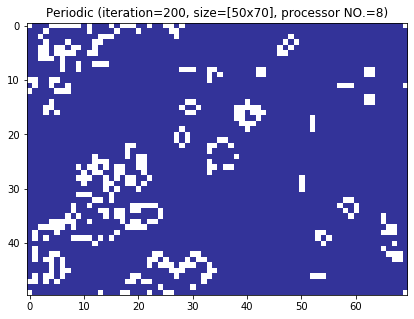

In [6]:
fig = plt.figure(figsize=[10, 5])
plt.title("Periodic (iteration=200, size=[50x70], processor NO.=8)")
i = 0

def get_mat(i):
    return all_mats_peri[i]

def updatefig(frame):
    i=frame
    im = plt.imshow(get_mat(i), cmap=cm.terrain, animated=True)
    im.set_array(get_mat(i))
    plt.grid
    return im,

ani1 = animation.FuncAnimation(fig, updatefig, frames=np.arange(0,loops+1),interval=120, blit=True)
ani1.save("periodic_50x70_200.gif", writer='pillow')
HTML(ani1.to_jshtml())

In [7]:
all_mats_non_peri = []
for i in range(loops+1):
    all_mats_non_peri.append(store_peri_once(i, False))

print(len(all_mats_non_peri))

201


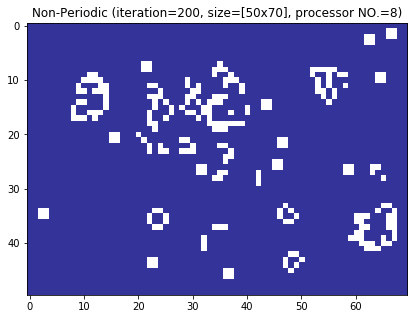

In [8]:
fig = plt.figure(figsize=[10, 5])
plt.title("Non-Periodic (iteration=200, size=[50x70], processor NO.=8)")
plt.gca()
i = 0

def get_mat(i):
    return all_mats_non_peri[i]

def updatefig(frame):
    i=frame
    im = plt.imshow(get_mat(i), cmap=cm.terrain, animated=True)
    im.set_array(get_mat(i))
    plt.grid
    return im,

ani2 = animation.FuncAnimation(fig, updatefig, frames=np.arange(0,loops+1),interval=120, blit=True)

ani2.save("non_periodic_50x70_200.gif", writer="pillow")
HTML(ani2.to_jshtml())